<a href="https://colab.research.google.com/github/aiswaryapaul/stock-price-prediction/blob/main/Stock_Price_Prediction_30June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/NFLX.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

In [ ]:
df.columns

Index(['Date', 'Adj Close'], dtype='object')

In [ ]:
df.rename(columns = {'Adj Close':'Final_Price'},inplace = True)

In [ ]:
df

,Date,Final_Price
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1009 non-null   object 
 1   Final_Price  1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date']) #converting into date time datatype

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Final_Price,float64


In [ ]:
#As our daily data is irregular, so we will be converting it to monthly data

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')
df

,Date,Final_Price,Month
0,2018-02-05,254.259995,2018-02
1,2018-02-06,265.720001,2018-02
2,2018-02-07,264.559998,2018-02
3,2018-02-08,250.100006,2018-02
4,2018-02-09,249.470001,2018-02
...,...,...,...
1004,2022-01-31,427.140015,2022-01
1005,2022-02-01,457.130005,2022-02
1006,2022-02-02,429.480011,2022-02
1007,2022-02-03,405.600006,2022-02


In [ ]:
df = df.groupby('Month')['Final_Price'].mean().reset_index()
df

,Month,Final_Price
0,2018-02,272.054705
1,2018-03,312.228097
2,2018-04,307.466192
3,2018-05,331.536819
4,2018-06,384.133336
5,2018-07,381.515238
6,2018-08,346.257824
7,2018-09,362.641576
8,2018-10,335.445652
9,2018-11,290.344764


In [ ]:
df['Month'] = df['Month'].dt.to_timestamp()
df

,Month,Final_Price
0,2018-02-01,272.054705
1,2018-03-01,312.228097
2,2018-04-01,307.466192
3,2018-05-01,331.536819
4,2018-06-01,384.133336
5,2018-07-01,381.515238
6,2018-08-01,346.257824
7,2018-09-01,362.641576
8,2018-10-01,335.445652
9,2018-11-01,290.344764


In [ ]:
df.set_index('Month',inplace = True)

In [ ]:
df

,Final_Price
Month,
2018-02-01,272.054705
2018-03-01,312.228097
2018-04-01,307.466192
2018-05-01,331.536819
2018-06-01,384.133336
2018-07-01,381.515238
2018-08-01,346.257824
2018-09-01,362.641576
2018-10-01,335.445652


<Axes: xlabel='Month'>

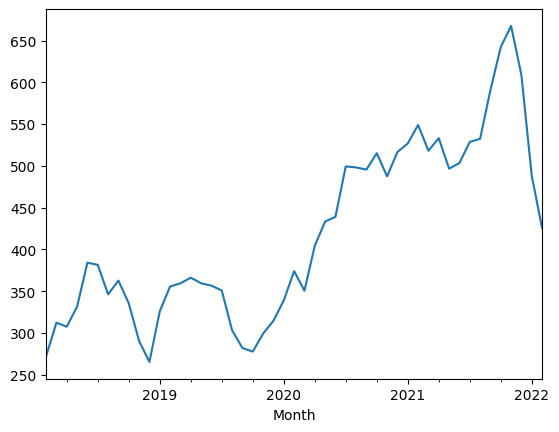

In [ ]:
df['Final_Price'].plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


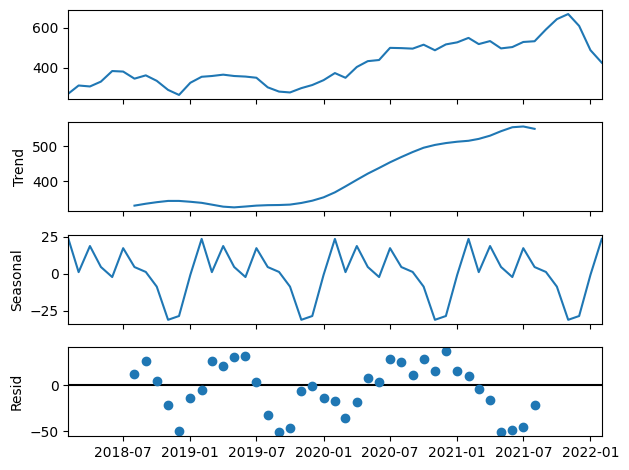

In [ ]:
decompose = seasonal_decompose(df)
print(decompose.plot())

**Check Stationarty**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['Final_Price'])
pv = result[1]
pv

np.float64(0.3854220410821773)

In [ ]:
# H0 = Data is not stationary
# H1 = Data is stationary

In [ ]:
if pv > 0.05:
  print('Data is not stationary') #null
else:
  print('Data is stationary') # alternate

Data is not stationary


**Make the data stationary** - Transformation

In [ ]:
df['Final_Price'] = np.log(df['Final_Price'])
df['Final_Price']

,Final_Price
Month,
2018-02-01,5.606003
2018-03-01,5.743734
2018-04-01,5.728365
2018-05-01,5.803739
2018-06-01,5.950990
2018-07-01,5.944151
2018-08-01,5.847184
2018-09-01,5.893415
2018-10-01,5.815460


In [ ]:
df.shape

(49, 1)

#Rolling mean and Rolling Std

In [ ]:
rolling_mean = df['Final_Price'].rolling(window = 3).mean()
rolling_std = df['Final_Price'].rolling(window = 3).std()

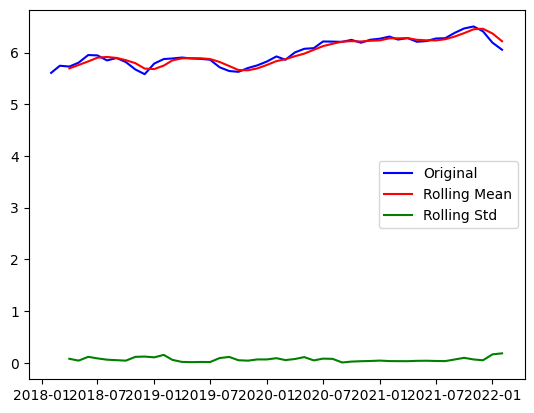

In [ ]:
plt.plot(df['Final_Price'],color = 'blue',label = 'Original')
plt.plot(rolling_mean,color = 'red',label = 'Rolling Mean')
plt.plot(rolling_std,color = 'green',label = 'Rolling Std')
plt.legend()
plt.show()

In [ ]:
diff_df = df['Final_Price'].diff() #as the lines of rolling mean and std were not flat, that means they are still not constant
diff_df #1st differencing

,Final_Price
Month,
2018-02-01,NaN
2018-03-01,0.137731
2018-04-01,-0.015369
2018-05-01,0.075374
2018-06-01,0.147251
2018-07-01,-0.006839
2018-08-01,-0.096967
2018-09-01,0.046231
2018-10-01,-0.077955


In [ ]:
diff_df.dropna(inplace = True)

In [ ]:
roll_mean_diff = diff_df.rolling(window = 3).mean()
roll_std_diff = diff_df.rolling(window = 3).std()

In [ ]:
diff_df

,Final_Price
Month,
2018-03-01,0.137731
2018-04-01,-0.015369
2018-05-01,0.075374
2018-06-01,0.147251
2018-07-01,-0.006839
2018-08-01,-0.096967
2018-09-01,0.046231
2018-10-01,-0.077955
2018-11-01,-0.144391


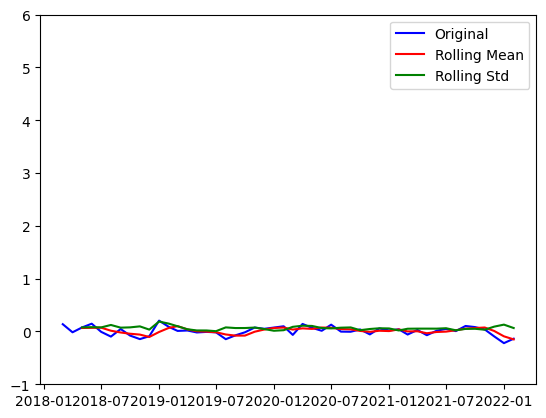

In [ ]:
plt.plot(diff_df,color = 'blue',label = 'Original')
plt.plot(roll_mean_diff,color = 'red',label = 'Rolling Mean')
plt.plot(roll_std_diff,color = 'green',label = 'Rolling Std')
plt.ylim(-1,6) #setting the log limits to compare with the previous graph for flat lines
plt.legend()
plt.show()

In [ ]:
#ADF
result = adfuller(diff_df)
pv = result[1]
pv

np.float64(2.6503311122300093e-05)

In [ ]:
if pv > 0.05:
  print('Data is not Stationary')
else:
  print('Data is stationary')

Data is stationary
